### Importing required libraries

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


import warnings
warnings.filterwarnings('ignore')

### Importing dataset

In [77]:
data = pd.read_csv("advertising.csv")

### Inspecting data

In [78]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [79]:
data.size

800

In [80]:
data.shape

(200, 4)

In [81]:
data.info

<bound method DataFrame.info of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

In [82]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


###  Visualizing data

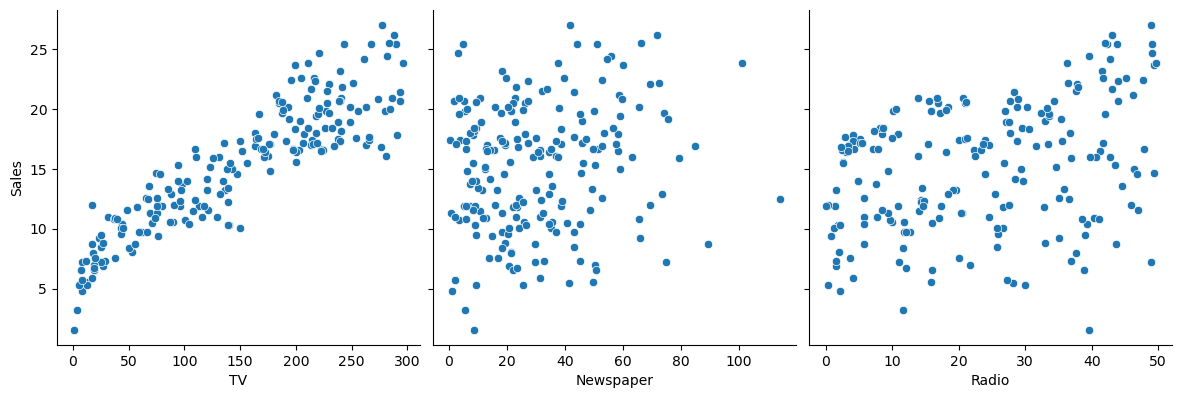

In [83]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales',size=4, aspect=1, kind='scatter')
plt.show()

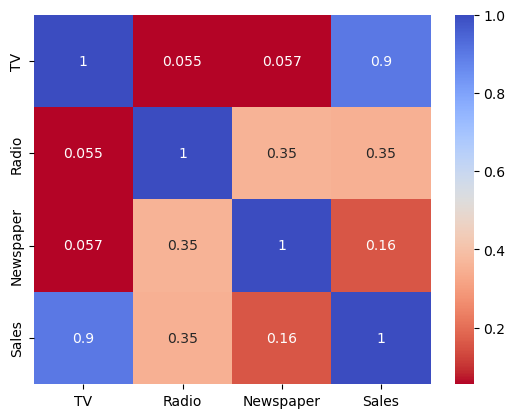

In [84]:
sns.heatmap(data.corr(), cmap="coolwarm_r", annot = True)
plt.show()

### Train - Test split

In [85]:
x= data.drop('Sales',axis= 1)
y = data['Sales']

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=4)

In [87]:
print("The Shape of X_train dataset:", x_train.shape)
print("The Shape of X_test dataset:", x_test.shape)
print("The Shape of y_train dataset:", y_train.shape)
print("The Shape of y_test dataset:", y_test.shape)

The Shape of X_train dataset: (140, 3)
The Shape of X_test dataset: (60, 3)
The Shape of y_train dataset: (140,)
The Shape of y_test dataset: (60,)


#### Linear Regression

In [88]:
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)
y_pred_lr = model_lr.predict(x_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print('Linear Regression MSE:', mse_lr)

Linear Regression MSE: 2.115304641204323


In [89]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_pred_lr,y_test))
print('Root MeanSquare Error:',np.sqrt(metrics.mean_squared_error(y_pred_lr,y_test)))
print('R-Squared',metrics.r2_score(y_pred_lr,y_test))

Mean Absolute Error: 1.1326610127766732
Root MeanSquare Error: 1.4544086912571457
R-Squared 0.9026540261796672


#### Decision tree Regressor

In [90]:
model_dt = DecisionTreeRegressor()
model_dt.fit(x_train, y_train)
y_pred_dt = model_dt.predict(x_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print('Decision Tree MSE:', mse_dt)

Decision Tree MSE: 1.8346666666666664


In [91]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_pred_dt,y_test))
print('Root MeanSquare Error:',np.sqrt(metrics.mean_squared_error(y_pred_dt,y_test)))
print('R-Squared',metrics.r2_score(y_pred_dt,y_test))

Mean Absolute Error: 1.02
Root MeanSquare Error: 1.3544986772480312
R-Squared 0.9256950145301303


#### Random forest Regressor

In [92]:
model_rf = RandomForestRegressor(n_estimators=100)
model_rf.fit(x_train, y_train)
y_pred_rf = model_rf.predict(x_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print('Random Forest MSE:', mse_rf)

Random Forest MSE: 1.4920407166666643


In [93]:
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred_rf))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred_rf))
print("R-squared_score:", metrics.r2_score(y_test, y_pred_rf))

Mean Absolute Error: 0.874016666666666
Mean Squared Error: 1.4920407166666643
R-squared_score: 0.9415462317055374


### Scores

In [94]:
models = {'dt' : DecisionTreeRegressor(),
          'lr' : LinearRegression(),
          'random' : RandomForestRegressor()}
report = {}
for i in range(len(list(models))):
            model = list(models.values())[i]
            print(f"Model Training started with {model}")
            model.fit(x_train,y_train)
            print(f"Training completed successfully")
            y_test_pred = model.predict(x_test)
            print("Calculating score")
            test_model_score = r2_score(y_test, y_test_pred)
            print(f"Calculted score: {round(test_model_score*100,2)}% for {model}")
            print("=="*30)
            report[list(models.keys())[i]] = test_model_score

Model Training started with DecisionTreeRegressor()
Training completed successfully
Calculating score
Calculted score: 93.97% for DecisionTreeRegressor()
Model Training started with LinearRegression()
Training completed successfully
Calculating score
Calculted score: 91.71% for LinearRegression()
Model Training started with RandomForestRegressor()
Training completed successfully
Calculating score
Calculted score: 94.06% for RandomForestRegressor()
